Heart failure prediction to prevent the patients from heart failure for future use.

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [130]:
h0=pd.read_csv('heart.csv')
h0

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [131]:
h0.info()
h0.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


(918, 12)

From the above info, there are 5 object datatypes present in feature column and we need to process them to convert to numerical data. 
There is missing values present in the dataset.

In [132]:
label=LabelEncoder()
h0['Sex']=label.fit_transform(h0['Sex'])
h0['Sex'].unique()

array([1, 0])

1-->Male
0-->Female

In [133]:
h0['Sex'].value_counts()

1    725
0    193
Name: Sex, dtype: int64

In [134]:
h0['ChestPainType']=label.fit_transform(h0['ChestPainType'])
h0['ChestPainType'].unique()

array([1, 2, 0, 3])

In [135]:
h0['ChestPainType'].value_counts()

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

In [136]:
h0['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [137]:
#Labeling for RestingECG feature
h0['RestingECG']=label.fit_transform(h0['RestingECG'])
h0['RestingECG'].unique()

array([1, 2, 0])

In [138]:
h0['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [139]:
h0['ExerciseAngina']=label.fit_transform(h0['ExerciseAngina'])
h0['ExerciseAngina'].unique()

array([0, 1])

In [140]:
h0['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [141]:
h0['ST_Slope']=label.fit_transform(h0['ST_Slope'])
h0['ST_Slope'].unique()

array([2, 1, 0])

In [142]:
h0

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [143]:
h0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [144]:
h0['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [145]:
diseased=h0['HeartDisease'][h0['HeartDisease']==1]
Non_diseased=h0['HeartDisease'][h0.HeartDisease==0]
print(diseased.shape)
print(Non_diseased.shape)

(508,)
(410,)


In [146]:
X=h0.drop(['HeartDisease'],axis=1)
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [147]:
Y=h0['HeartDisease']
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [148]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print('training input samples:',len(X_train))
print('testing input samples:',len(X_test))

training input samples: 734
testing input samples: 184


In [149]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train) # xtrain = training input samples
X_test=ss.transform(X_test) # xtest - testing input samples


# Random Forest 

In [150]:
from sklearn.ensemble import RandomForestClassifier

clfr=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

clfr.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [151]:
from sklearn.ensemble import RandomForestClassifier

clfr1=RandomForestClassifier(n_estimators=10,criterion='gini',random_state=0)

clfr1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [152]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

ypre=clfr.predict(X_test)# entropy ypre calculation

ypre1=clfr1.predict(X_test)# gini ypre calculation

In [153]:
print('entropy Accuracy Score:')
RF_entropy_acc=accuracy_score(y_test,ypre)*100
RF_entropy_acc
RF=print("%.2f" % RF_entropy_acc)
RF

entropy Accuracy Score:
87.50


In [154]:
print('gini Accuracy Score:')
accuracy_score(y_test,ypre1)*100

gini Accuracy Score:


85.32608695652173

In [155]:
print('entropy - confusion matrix\n--------------------\n')
print(confusion_matrix(y_test,ypre))
print('gini - confusion matrix\n--------------------\n')
print(confusion_matrix(y_test,ypre1))

entropy - confusion matrix
--------------------

[[63 11]
 [12 98]]
gini - confusion matrix
--------------------

[[65  9]
 [18 92]]


In [156]:
print('entropy result\n--------------')
print(classification_report(y_test,ypre))
print('gini index result\n----------------------')
print(classification_report(y_test,ypre1))

entropy result
--------------
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        74
           1       0.90      0.89      0.89       110

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

gini index result
----------------------
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        74
           1       0.91      0.84      0.87       110

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



# Naive Bayes

In [157]:
# Guassian Naive Bayes

from sklearn.naive_bayes import GaussianNB # importation

Gmodel=GaussianNB() # invocation

Gmodel.fit(X_train,y_train)

train_Gpred=Gmodel.predict(X_train)

test_Gpred=Gmodel.predict(X_test) 

train_acc_gau=np.mean(train_Gpred==y_train)

test_acc_gau=np.mean(test_Gpred==y_test)

print('gaussian naive bayes - training accuracy:',train_acc_gau*100,'%')
print('gaussian nb - testing time accuracy:',test_acc_gau*100,'%')
NB_acc=test_acc_gau*100
NB=print("%.2f" % NB_acc)
NB


gaussian naive bayes - training accuracy: 85.01362397820164 %
gaussian nb - testing time accuracy: 89.13043478260869 %
89.13


# Support Vector Machine (SVM) Alogorithm

In [158]:
from sklearn.svm import SVC
model=SVC(kernel='linear',random_state=7)
model.fit(X_train,y_train)

SVC(kernel='linear', random_state=7)

In [159]:
y_pre=model.predict(X_test)
y_pre

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [160]:
confusion_matrix(y_pre,y_test)

array([[ 65,   7],
       [  9, 103]], dtype=int64)

In [161]:
print(classification_report(y_pre,y_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        72
           1       0.94      0.92      0.93       112

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



In [162]:
SVM_acc=accuracy_score(y_pre,y_test)*100
SVM_acc
SVM=print("%.2f" % SVM_acc)
SVM

91.30


<function matplotlib.pyplot.show(close=None, block=None)>

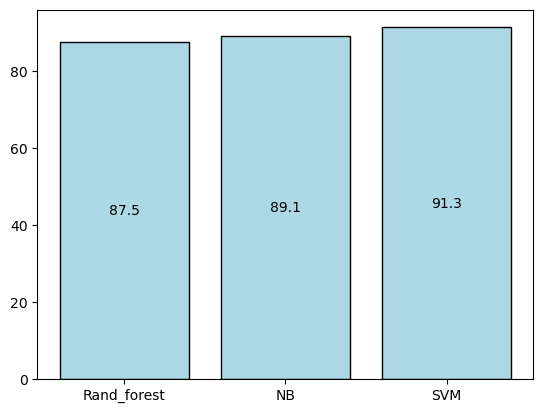

In [163]:
label=['Rand_forest','NB','SVM']
Accur=[87.5,89.1,91.3]
plot=plt.bar(x=label,height=Accur,fc="lightblue",ec='black')
plt.bar_label(plot,label=Accur,label_type='center')
plt.show